<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
    The input layer is the starting point for any nueral network. This layer receives the initial input from our data set. All of the remaining layers will be a derivative of the input layer. 
### Hidden Layer:
    The hidden layer(s) comes after the input layer and can not be directly accessed. The hidden layers apply weights or transformations that produce an output specific to an intended result. The hidden layer(s) can only be accessed through the input layer. The term "Deep Learning" refers to the ability of neural networks to have multiple hidden layers.
### Output Layer:
    The output layer returns vector values in a format that is desired. An activation function is usually applied achieve a desired transformation of data into a workable format.
### Neuron:
    A neuron in a nueral network is also known as a node is a set of inputs, weights, and a bias value. The output of a node is either observed or passed along to the next layer in the network. 
### Weight:
    A weight allows you to transform input data within the network's hidden layers. Weights show the strength of a particular node. 
### Activation Function:
    Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron's input is relevant for the model's prediction.
### Node Map:
    A node map is a high level overview of the architecture of the neural network. 
### Perceptron:
    A perceptron is a single node or neuron of a neural network.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

    The flow of information through a neural network starts with an input, gets transformed by hidden layer weights,  passes through to an activation function and formatted, and then output.  

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [3]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [40]:
#making into array
import numpy as np

inputs = np.array([
    [0,1,0,1],
    [0,0,1,1],
])

inputs

#correct_outputs = [[1], [1], [1], [0]]

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [41]:
import numpy as np
weights = 2 * np.random.random((4,1)) - 1
weights

array([[-0.15166206],
       [ 0.57965285],
       [-0.85564735],
       [ 0.77086709]])

In [42]:
#calculate weighted sum
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[ 1.35051995],
       [-0.08478026]])

In [43]:
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.79421462],
       [0.47881762]])

In [46]:
#not sure this is correct
correct_outputs = [[1], [0]]
error_1 = correct_outputs - activated_outputs
error_1

array([[ 0.20578538],
       [-0.47881762]])

In [47]:
#not sure this is correct
correct_outputs = [[0], [1]]
error_2 = correct_outputs - activated_outputs
error_2

array([[-0.79421462],
       [ 0.52118238]])

In [48]:
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments

array([[ 0.0336331 ],
       [-0.11948956]])

In [49]:
weights += np.dot(inputs.T, adjustments)
weights

array([[-0.15166206],
       [ 0.61328595],
       [-0.97513691],
       [ 0.68501063]])

In [50]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-0.15166206]
 [-5.27875023]
 [ 4.58084251]
 [ 0.34895386]]
Output after training
[[0.00717647]
 [0.99282353]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [51]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [134]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = diabetes.iloc[0:100, [5,6]].values
X

array([[33.6  ,  0.627],
       [26.6  ,  0.351],
       [23.3  ,  0.672],
       [28.1  ,  0.167],
       [43.1  ,  2.288],
       [25.6  ,  0.201],
       [31.   ,  0.248],
       [35.3  ,  0.134],
       [30.5  ,  0.158],
       [ 0.   ,  0.232],
       [37.6  ,  0.191],
       [38.   ,  0.537],
       [27.1  ,  1.441],
       [30.1  ,  0.398],
       [25.8  ,  0.587],
       [30.   ,  0.484],
       [45.8  ,  0.551],
       [29.6  ,  0.254],
       [43.3  ,  0.183],
       [34.6  ,  0.529],
       [39.3  ,  0.704],
       [35.4  ,  0.388],
       [39.8  ,  0.451],
       [29.   ,  0.263],
       [36.6  ,  0.254],
       [31.1  ,  0.205],
       [39.4  ,  0.257],
       [23.2  ,  0.487],
       [22.2  ,  0.245],
       [34.1  ,  0.337],
       [36.   ,  0.546],
       [31.6  ,  0.851],
       [24.8  ,  0.267],
       [19.9  ,  0.188],
       [27.6  ,  0.512],
       [24.   ,  0.966],
       [33.2  ,  0.42 ],
       [32.9  ,  0.665],
       [38.2  ,  0.503],
       [37.1  ,  1.39 ],


In [135]:
y = diabetes.iloc[0:100, 8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

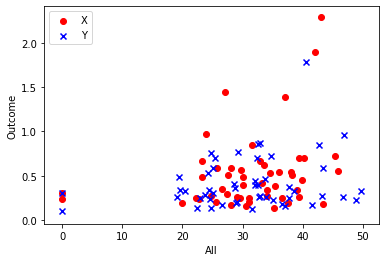

In [136]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='X')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Y')
plt.xlabel('All')
plt.ylabel('Outcome')
plt.legend(loc='upper left')
plt.show()

In [138]:
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

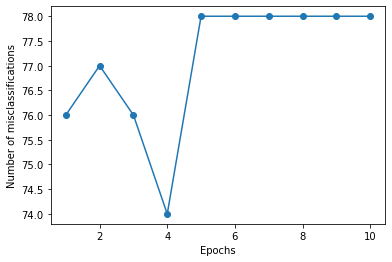

In [140]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?